In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_folder = "/content/drive/MyDrive/data_flowdesk/data/"
!ls $data_folder

asset_details.csv  train.csv


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
crypto_df = pd.read_csv(data_folder + 'train.csv')
crypto_df['timestamp'] = pd.to_datetime(crypto_df['timestamp'], unit='s')

In [ ]:
crypto_df

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,2018-01-01 00:01:00,2,40.0,2376.580000,2399.500000,2357.140000,2374.590000,1.923301e+01,2373.116392,-0.004218
1,2018-01-01 00:01:00,0,5.0,8.530000,8.530000,8.530000,8.530000,7.838000e+01,8.530000,-0.014399
2,2018-01-01 00:01:00,1,229.0,13835.194000,14013.800000,13666.110000,13850.176000,3.155006e+01,13827.062093,-0.014643
3,2018-01-01 00:01:00,5,32.0,7.659600,7.659600,7.656700,7.657600,6.626713e+03,7.657713,-0.013922
4,2018-01-01 00:01:00,7,5.0,25.920000,25.920000,25.874000,25.877000,1.210873e+02,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
24236801,2021-09-21 00:00:00,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,2021-09-21 00:00:00,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,2021-09-21 00:00:00,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,2021-09-21 00:00:00,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN


In [ ]:
# Fill NaN values with np.inf or -np.inf
crypto_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
crypto_df = crypto_df.pivot_table(index=['timestamp'], columns = ["Asset_ID"]).reset_index()
crypto_df.fillna(method='ffill', inplace=True)

In [ ]:
crypto_df.columns = [f'{col[0]}_{col[1]}' if isinstance(col[1], int) else col[0] for col in crypto_df.columns]
print(crypto_df)

                  timestamp   Close_0       Close_1      Close_2   Close_3  \
0       2018-01-01 00:01:00    8.5300  13850.176000  2374.590000       NaN   
1       2018-01-01 00:02:00    8.5145  13828.102000  2372.286667       NaN   
2       2018-01-01 00:03:00    8.4848  13801.314000  2372.063333       NaN   
3       2018-01-01 00:04:00    8.5009  13768.040000  2370.566667       NaN   
4       2018-01-01 00:05:00    8.4560  13724.914000  2370.173333       NaN   
...                     ...       ...           ...          ...       ...   
1956777 2021-09-20 23:56:00  362.9180  42899.012857   541.902000  2.067367   
1956778 2021-09-20 23:57:00  362.2000  42860.005714   538.690000  2.066106   
1956779 2021-09-20 23:58:00  361.8580  42827.020000   538.775000  2.064901   
1956780 2021-09-20 23:59:00  364.1145  43017.277143   542.512500  2.080337   
1956781 2021-09-21 00:00:00  363.7575  43002.505000   541.045000  2.079269   

          Close_4   Close_5      Close_6    Close_7  Close_8  .

In [ ]:
# crypto_df.dropna(inplace=True)
crypto_df.fillna(0, inplace=True)

# Only keeping the moment where we have data for all assets.
# By doing so, we only keep 1 million rows instead of 2 million rows
# another possibility is to just replace by 0...

In [ ]:
crypto_df

,timestamp,Close_0,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,...,Volume_4,Volume_5,Volume_6,Volume_7,Volume_8,Volume_9,Volume_10,Volume_11,Volume_12,Volume_13
0,2018-01-01 00:01:00,8.5300,13850.176000,2374.590000,0.000000,0.000000,7.657600,738.507500,25.877000,0.00000,...,0.000000e+00,6626.713370,335.987856,121.087310,0.0000,411.896642,0.000000,6.635710,0.000000,0.000000e+00
1,2018-01-01 00:02:00,8.5145,13828.102000,2372.286667,0.000000,0.000000,7.656700,738.260000,25.897000,0.00000,...,0.000000e+00,3277.475494,232.793141,1.468019,0.0000,3640.502706,0.000000,0.349420,0.000000,0.000000e+00
2,2018-01-01 00:03:00,8.4848,13801.314000,2372.063333,0.000000,0.000000,7.651200,737.502500,26.469500,0.00000,...,0.000000e+00,5623.557585,174.138031,76.163922,0.0000,328.350286,0.000000,1.189553,0.000000,0.000000e+00
3,2018-01-01 00:04:00,8.5009,13768.040000,2370.566667,0.000000,0.000000,7.635800,737.102500,26.449500,0.00000,...,0.000000e+00,1696.632459,165.383926,408.774848,0.0000,507.405579,0.000000,1.512079,0.000000,0.000000e+00
4,2018-01-01 00:05:00,8.4560,13724.914000,2370.173333,0.000000,0.000000,7.610000,735.705000,26.437000,0.00000,...,0.000000e+00,2268.362218,193.078039,529.337600,0.0000,1035.671830,0.000000,11.997972,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956777,2021-09-20 23:56:00,362.9180,42899.012857,541.902000,2.067367,0.207445,4.188017,2964.711429,49.082117,1.28045,...,1.895146e+06,27811.498394,751.256906,3300.202811,12147.3921,1361.041737,0.908325,114.310820,142533.884179,2.613704e+06
1956778,2021-09-20 23:57:00,362.2000,42860.005714,538.690000,2.066106,0.206920,4.179167,2960.845714,48.878480,1.27695,...,1.059219e+06,27641.893811,729.113672,789.899418,21186.7339,695.378065,1.070306,19.751763,152181.736233,4.991573e+06
1956779,2021-09-20 23:58:00,361.8580,42827.020000,538.775000,2.064901,0.206797,4.175733,2957.398571,48.826767,1.27500,...,4.201725e+05,18268.802763,807.935362,574.742717,8688.6624,1249.620035,8.953943,123.418300,92322.353887,3.699102e+06
1956780,2021-09-20 23:59:00,364.1145,43017.277143,542.512500,2.080337,0.208621,4.198733,2977.190000,49.078275,1.28455,...,2.583981e+06,77993.603539,1723.473979,3269.240163,11314.2341,2053.657529,6.107466,115.242365,681270.709717,3.241507e+06


In [ ]:
asset_details = pd.read_csv(data_folder + 'asset_details.csv')

In [ ]:
asset_details.sort_values(by='Asset_ID')

,Asset_ID,Weight,Asset_Name
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
0,2,2.397895,Bitcoin Cash
10,3,4.406719,Cardano
13,4,3.555348,Dogecoin
3,5,1.386294,EOS.IO
5,6,5.894403,Ethereum
4,7,2.079442,Ethereum Classic
11,8,1.098612,IOTA
6,9,2.397895,Litecoin


# Plots

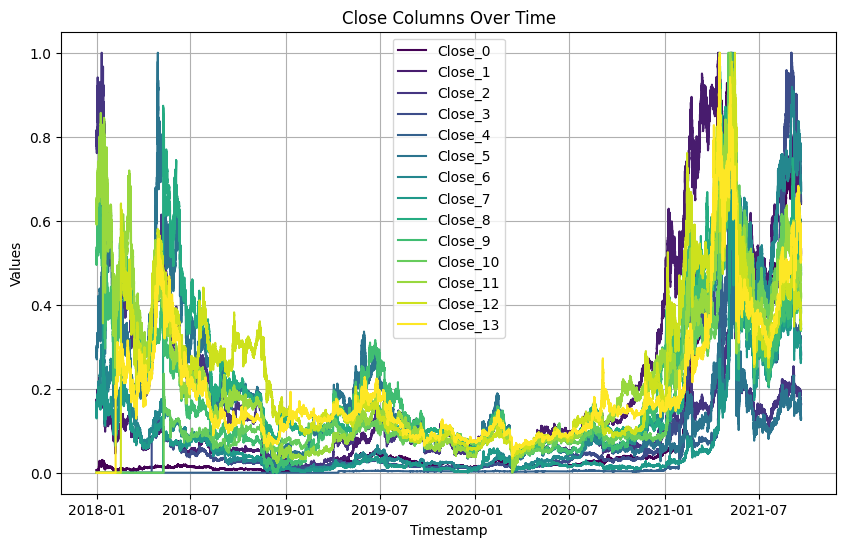

In [ ]:
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler

# Filter columns that start with "Target"
target_columns = [col for col in crypto_df.columns if col.startswith('Close')]

# Create a MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Generate a colormap
colors = cm.viridis(np.linspace(0, 1, len(target_columns)))

# Plotting
plt.figure(figsize=(10, 6))

for color, column in zip(colors, target_columns):
    scaled_data = scaler.fit_transform(crypto_df[[column]])
    plt.plot(crypto_df['timestamp'], scaled_data, label=column, color=color)

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Close Columns Over Time')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



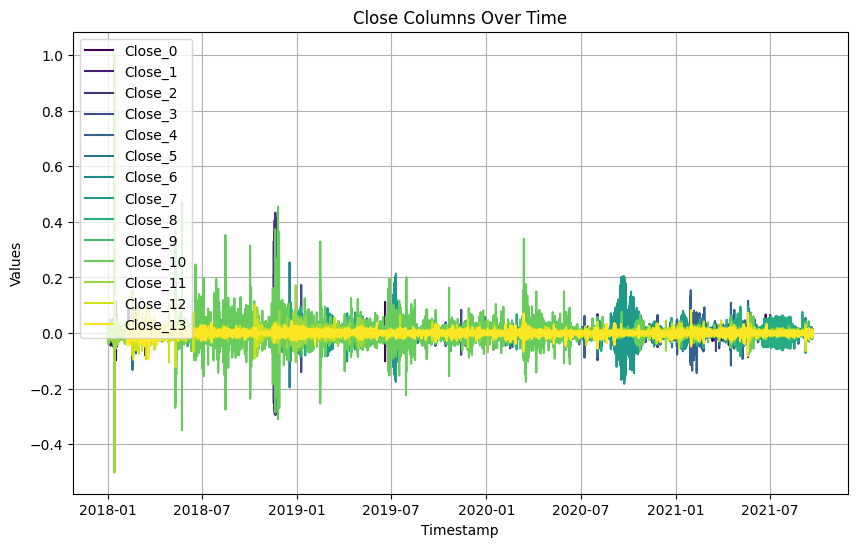

In [ ]:
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler

# Filter columns that start with "Target"
target_columns = [col for col in crypto_df.columns if col.startswith('Close')]

temp = crypto_df[target_columns].pct_change()
temp

# Generate a colormap
colors = cm.viridis(np.linspace(0, 1, len(target_columns)))

# Plotting
plt.figure(figsize=(10, 6))

for color, column in zip(colors, target_columns):
    plt.plot(crypto_df['timestamp'], temp[[column]], label=column, color=color)

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Close Columns Over Time')
plt.legend()
plt.grid(True)
plt.show()

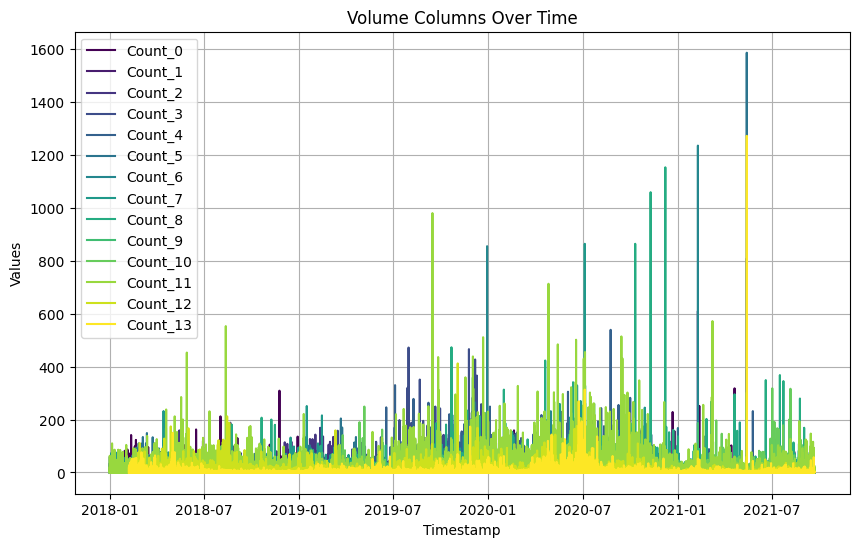

In [ ]:
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler

# Filter columns that start with "Target"
target_columns = [col for col in crypto_df.columns if col.startswith('Count')]

temp = crypto_df[target_columns].pct_change()
temp

# Generate a colormap
colors = cm.viridis(np.linspace(0, 1, len(target_columns)))

# Plotting
plt.figure(figsize=(10, 6))

for color, column in zip(colors, target_columns):
    plt.plot(crypto_df['timestamp'], temp[[column]], label=column, color=color)

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Count Columns Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Model

In [ ]:
pip install tscv

In [ ]:
import numpy as np
from tscv import GapRollForward

In [ ]:
def get_feats(df, crypto_id):

    timestamp = df['timestamp']
    target = df['Target_' + str(crypto_id)]

    # features of crypto_id
    features = df[[col for col in df.columns if col.endswith('_'+str(crypto_id)) and not(col.startswith('Target_'))]]
    features['upper_shadow_' + str(crypto_id)] = df['High_'+ str(crypto_id)] - np.maximum(df['Close_'+ str(crypto_id)], df['Open_'+ str(crypto_id)])
    features['lower_shadow_' + str(crypto_id)] = np.minimum(df['Close_'+ str(crypto_id)], df['Open_'+ str(crypto_id)]) - df['Low_'+ str(crypto_id)]

    lags = [17]
    for lag in lags:
      features['Close_' + str(crypto_id) + '_pctchange' + str(lag)] = df['Close_' + str(crypto_id)].pct_change(periods = lag)

    lags = [17]
    for lag in lags:
      features['Target_' + str(crypto_id) + 'lag' + str(lag)] = df['Target_' + str(crypto_id)].shift(17, fill_value = 0)

    # metafeatures
    features['minute'] = df['timestamp'].dt.minute
    features['hour'] = df['timestamp'].dt.hour

    # dynamic features through time on several cryptos

    # Weighted sum of 'Close_' columns divided by sum of 'Count_' columns
    features['Close_Count'] = sum(df['Close_' + str(i)] * df['Count_' + str(i)] for i in range(13)) / df[[col for col in df.columns if col.startswith('Count_')]].sum(axis=1)
    features['deltaCount'] = sum(df['Count_' + str(i)].pct_change(periods = 1) for i in range(13))

    #features['High_Volume'] = sum(df['High_' + str(i)] * df['Volume_' + str(i)] for i in range(13)) / df[[col for col in df.columns if col.startswith('Volume_')]].sum(axis=1)

    # in the last 17 minutes, which crypto has decreased / increased the most ?


    #for crypto in range(14):
    #  features['upper_shadow_' + str(crypto)] = df['High_'+ str(crypto)] - np.maximum(df['Close_'+ str(crypto)], df['Open_'+ str(crypto)])
    #  features['lower_shadow_' + str(crypto)] = np.minimum(df['Close_'+ str(crypto)], df['Open_'+ str(crypto)]) - df['Low_'+ str(crypto)]
    #  df['lower_shadow'] = np.minimum(df['Close'], df['Open']) - df['Low']

    #lags = [1, 5, 20]
    #for crypto in range(14):
    #  for lag in lags:
    #    df['Close_' + str(crypto) + 'lag' + str(lag)] = df['Close_' + str(crypto)].shift(lag, fill_value=0)
        ## df['Close' + 'ma_' + str(lag)] = df['Close'].rolling(window = lag, min_periods = 1).mean()

    #features['dayofweek'] = df['timestamp'].dt.dayofweek

    #for crypto in range(14):
    #  features['Count_' + 'x' + 'Close_' + str(crypto)] = df['Count_' + str(crypto)] * df['Close_' + str(crypto)]

    features.fillna(0, inplace= True)

    return timestamp, features, target

In [ ]:
# gap siz must be > 16, ideally > last lag value

tscv = GapRollForward(min_train_size=17*4*24*30, max_train_size=17*4*24*30,
                    min_test_size =17*4*24*30, max_test_size=17*4*24*30,
                    gap_size=500, roll_size= 17*4*24*35)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
import lightgbm as lgb

# implement basic ML baseline (one per asset)
lr = LinearRegression()
rcv = RidgeCV()
sgd = SGDRegressor()
lgb = lgb.LGBMRegressor()


In [ ]:
#del timestamp, features, target
timestamp, features, target = get_feats(crypto_df, 1)
# del crypto_df

<ipython-input-65-18cb78bea05d>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-18cb78bea05d>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-18cb78bea05d>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-18cb78

In [ ]:
list(features.columns)

['Close_1',
 'Count_1',
 'High_1',
 'Low_1',
 'Open_1',
 'VWAP_1',
 'Volume_1',
 'upper_shadow_1',
 'lower_shadow_1',
 'Close_1_pctchange17',
 'Target_1lag17',
 'minute',
 'hour',
 'Close_Count',
 'deltaCount']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.metrics import mean_squared_error

models = []
corrcoef_train = []
mse_train = []
corrcoef_test = []
mse_test = []

for train_index, test_index in tqdm(tscv.split(timestamp)):
  X_train = features.iloc[train_index]
  y_train = target.iloc[train_index]

  X_test = features.iloc[test_index]
  y_test = target.iloc[test_index]

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  model = lr
  model.fit(X_train,y_train)
  models.append(model)

  y_predict_train = model.predict(X_train)
  y_predict_test = model.predict(X_test)

  corrcoef_train.append(np.corrcoef(y_predict_train, y_train)[0,1])
  mse_train.append(mean_squared_error(y_predict_train, y_train))
  corrcoef_test.append(np.corrcoef(y_predict_test, y_test)[0,1])
  mse_test.append(mean_squared_error(y_predict_test, y_test))
  print('Score for train ', train_index.min(), train_index.max(),": ", f"{np.corrcoef(y_predict_train, y_train)[0,1]:.5f}")
  print('Score for train ', len(train_index), ": ", f"{mean_squared_error(y_predict_train, y_train)}")
  print('Score for test ',test_index.min(), test_index.max(),": ", f"{np.corrcoef(y_predict_test, y_test)[0,1]:.5f}")
  print('Score for test ',len(test_index),": ", f"{mean_squared_error(y_predict_test, y_test)}")
  print("\n")

2it [00:00, 10.27it/s]

Score for train  0 48959 :  0.09579
Score for train  48960 :  1.256317962080806e-05
Score for test  49460 98419 :  0.15719
Score for test  48960 :  4.028887991088242e-06


Score for train  57120 106079 :  0.17128
Score for train  48960 :  3.5646219354215113e-06
Score for test  106580 155539 :  0.09004
Score for test  48960 :  2.7205297977243347e-06




4it [00:00,  8.19it/s]

Score for train  114240 163199 :  0.10051
Score for train  48960 :  2.4742688371223464e-06
Score for test  163700 212659 :  0.02906
Score for test  48960 :  1.972112565754974e-06


Score for train  171360 220319 :  0.10520
Score for train  48960 :  1.6961560835386492e-06
Score for test  220820 269779 :  0.03861
Score for test  48960 :  1.6318370168883144e-06




6it [00:00,  7.01it/s]

Score for train  228480 277439 :  0.07946
Score for train  48960 :  1.6590496421030568e-06
Score for test  277940 326899 :  0.04583
Score for test  48960 :  2.6372378218178923e-06


Score for train  285600 334559 :  0.10322
Score for train  48960 :  2.6228133244197956e-06
Score for test  335060 384019 :  0.05170
Score for test  48960 :  1.4714571104809661e-06




8it [00:01,  6.33it/s]

Score for train  342720 391679 :  0.06781
Score for train  48960 :  1.3931932618783531e-06
Score for test  392180 441139 :  -0.04144
Score for test  48960 :  4.228969175991681e-06


Score for train  399840 448799 :  0.08601
Score for train  48960 :  4.228838395929974e-06
Score for test  449300 498259 :  0.00095
Score for test  48960 :  7.290088384735155e-06




10it [00:01,  6.24it/s]

Score for train  456960 505919 :  0.07942
Score for train  48960 :  6.8155586398160925e-06
Score for test  506420 555379 :  -0.03812
Score for test  48960 :  3.508705835618203e-06


Score for train  514080 563039 :  0.08137
Score for train  48960 :  3.0225427019611775e-06
Score for test  563540 612499 :  0.06195
Score for test  48960 :  3.036210421690098e-06




12it [00:01,  6.00it/s]

Score for train  571200 620159 :  0.07945
Score for train  48960 :  3.3140579008161026e-06
Score for test  620660 669619 :  0.01031
Score for test  48960 :  3.730894620839558e-06


Score for train  628320 677279 :  0.09997
Score for train  48960 :  3.4106120094901914e-06
Score for test  677780 726739 :  0.00396
Score for test  48960 :  6.476225709755989e-06




14it [00:02,  6.01it/s]

Score for train  685440 734399 :  0.09043
Score for train  48960 :  6.379289585870988e-06
Score for test  734900 783859 :  0.03908
Score for test  48960 :  5.340255011463489e-06


Score for train  742560 791519 :  0.10759
Score for train  48960 :  5.723057267598775e-06
Score for test  792020 840979 :  0.08972
Score for test  48960 :  5.209995133210591e-06




16it [00:02,  6.15it/s]

Score for train  799680 848639 :  0.10117
Score for train  48960 :  4.018987366710752e-06
Score for test  849140 898099 :  0.02381
Score for test  48960 :  2.090547794889036e-06


Score for train  856800 905759 :  0.08639
Score for train  48960 :  1.8020091257642825e-06
Score for test  906260 955219 :  0.01693
Score for test  48960 :  6.627880333701297e-06




18it [00:02,  6.01it/s]

Score for train  913920 962879 :  0.17477
Score for train  48960 :  6.695971834104809e-06
Score for test  963380 1012339 :  -0.02330
Score for test  48960 :  1.6100079073914373e-06


Score for train  971040 1019999 :  0.08239
Score for train  48960 :  1.3263793550380026e-06
Score for test  1020500 1069459 :  -0.01974
Score for test  48960 :  2.0292090897156224e-06




20it [00:03,  5.93it/s]

Score for train  1028160 1077119 :  0.05867
Score for train  48960 :  2.3010247098854055e-06
Score for test  1077620 1126579 :  0.03147
Score for test  48960 :  1.6656983931344876e-06


Score for train  1085280 1134239 :  0.06278
Score for train  48960 :  1.6997423235526828e-06
Score for test  1134740 1183699 :  0.08522
Score for test  48960 :  5.187245753764127e-06




21it [00:03,  5.97it/s]

Score for train  1142400 1191359 :  0.12063
Score for train  48960 :  5.249815666754684e-06
Score for test  1191860 1240819 :  0.03250
Score for test  48960 :  2.2061884494144084e-06


Score for train  1199520 1248479 :  0.09898
Score for train  48960 :  2.6674776850517348e-06
Score for test  1248980 1297939 :  0.02679
Score for test  48960 :  1.5811883652892423e-06




24it [00:03,  5.77it/s]

Score for train  1256640 1305599 :  0.07686
Score for train  48960 :  1.377527789305419e-06
Score for test  1306100 1355059 :  0.04068
Score for test  48960 :  1.982811464866841e-06


Score for train  1313760 1362719 :  0.11303
Score for train  48960 :  2.237327125862855e-06
Score for test  1363220 1412179 :  0.00973
Score for test  48960 :  1.9218906679006682e-06




26it [00:04,  5.81it/s]

Score for train  1370880 1419839 :  0.08639
Score for train  48960 :  1.8484251936756354e-06
Score for test  1420340 1469299 :  0.02096
Score for test  48960 :  1.7017782021910384e-06


Score for train  1428000 1476959 :  0.05411
Score for train  48960 :  1.7578632974792443e-06
Score for test  1477460 1526419 :  -0.04242
Score for test  48960 :  4.014510027635777e-06




28it [00:04,  6.19it/s]

Score for train  1485120 1534079 :  0.07522
Score for train  48960 :  4.631261179765074e-06
Score for test  1534580 1583539 :  0.04442
Score for test  48960 :  6.797587354581197e-06


Score for train  1542240 1591199 :  0.08590
Score for train  48960 :  8.639639494551671e-06
Score for test  1591700 1640659 :  -0.00802
Score for test  48960 :  1.7126006373285358e-05




30it [00:04,  6.84it/s]

Score for train  1599360 1648319 :  0.06837
Score for train  48960 :  1.599630382140978e-05
Score for test  1648820 1697779 :  0.02219
Score for test  48960 :  4.981464610697786e-06


Score for train  1656480 1705439 :  0.05644
Score for train  48960 :  3.7121529017605496e-06
Score for test  1705940 1754899 :  0.02011
Score for test  48960 :  3.8146462809286853e-06




32it [00:05,  6.31it/s]

Score for train  1713600 1762559 :  0.10590
Score for train  48960 :  4.348562534585537e-06
Score for test  1763060 1812019 :  0.07783
Score for test  48960 :  7.818878199146947e-06


Score for train  1770720 1819679 :  0.10719
Score for train  48960 :  7.188156955745419e-06
Score for test  1820180 1869139 :  0.00848
Score for test  48960 :  2.746164088268845e-06




33it [00:05,  6.25it/s]

Score for train  1827840 1876799 :  0.11476
Score for train  48960 :  2.6998602343459674e-06
Score for test  1877300 1926259 :  0.04351
Score for test  48960 :  2.249516611115116e-06




corr train:  0.09325583504150996
corr test:  0.028788331549474824


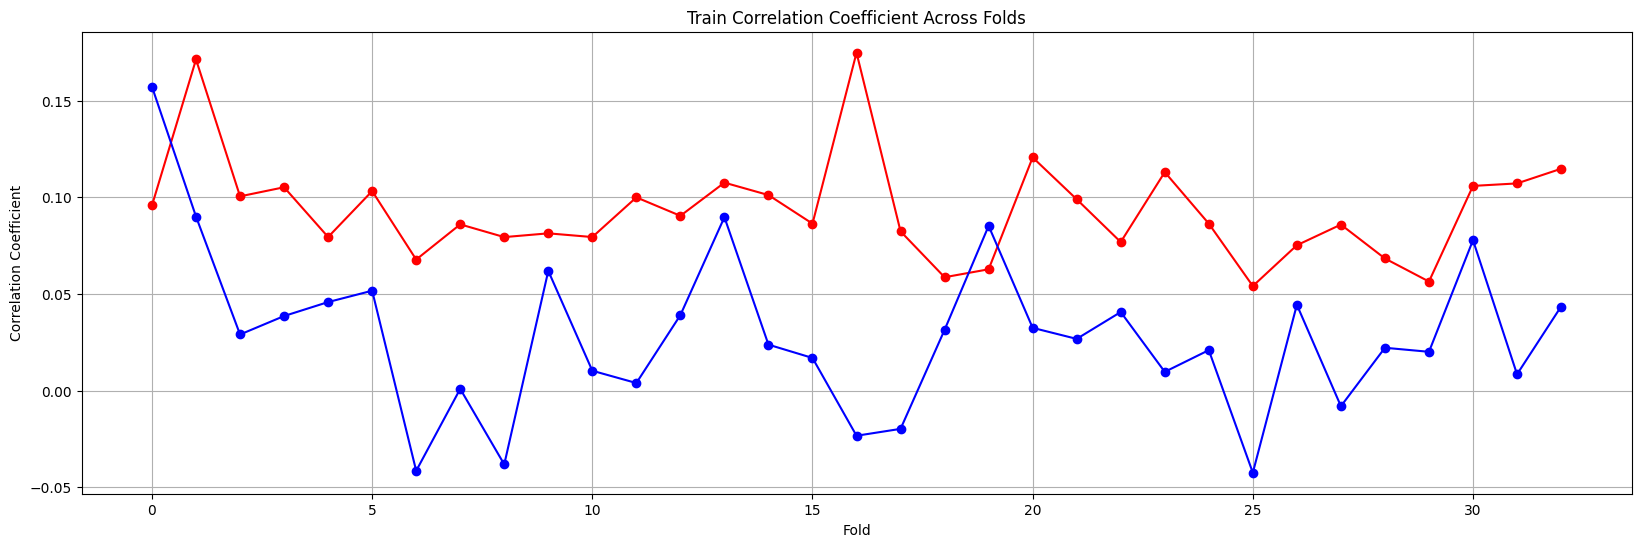

In [ ]:
print("corr train: ", np.nanmean(corrcoef_train))
print("corr test: ", np.nanmean(corrcoef_test))

# Create a plot for Train Correlation Coefficient
plt.figure(figsize=(20, 6))
plt.plot(corrcoef_train, marker='o', linestyle='-', color='r')
plt.title('Train Correlation Coefficient Across Folds')
plt.xlabel('Fold')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.plot(corrcoef_test, marker='o', linestyle='-', color='b')
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots()

fig.add_trace(
    go.Box(
        y= corrcoef_train,
        name = 'Train pcc'
    ))

fig.add_trace(
    go.Box(
        y= corrcoef_test,
        name = 'Test pcc'
    ))
fig.show()

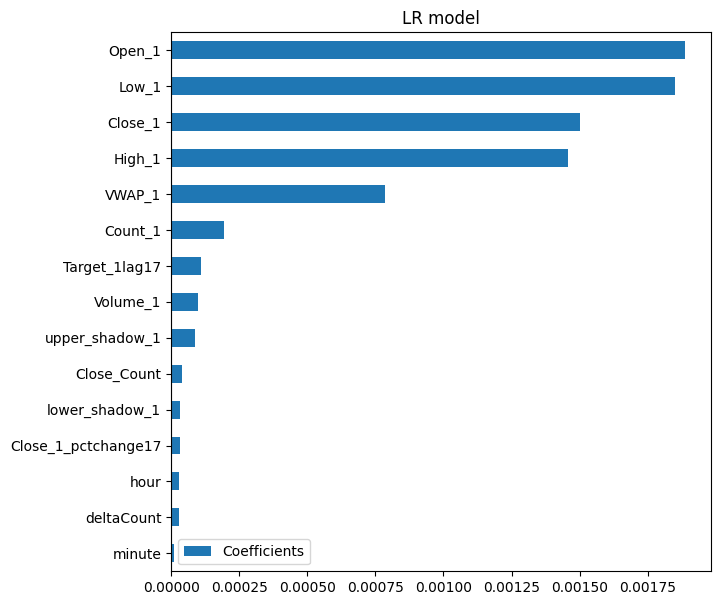

In [ ]:
## Feature importance for LinearRegression

import matplotlib.pyplot as plt

coefs = pd.DataFrame(np.abs(models[2].coef_), columns=["Coefficients"], index= features.columns)
coefs = coefs.sort_values(by='Coefficients', ascending=True)[:30]
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("LR model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

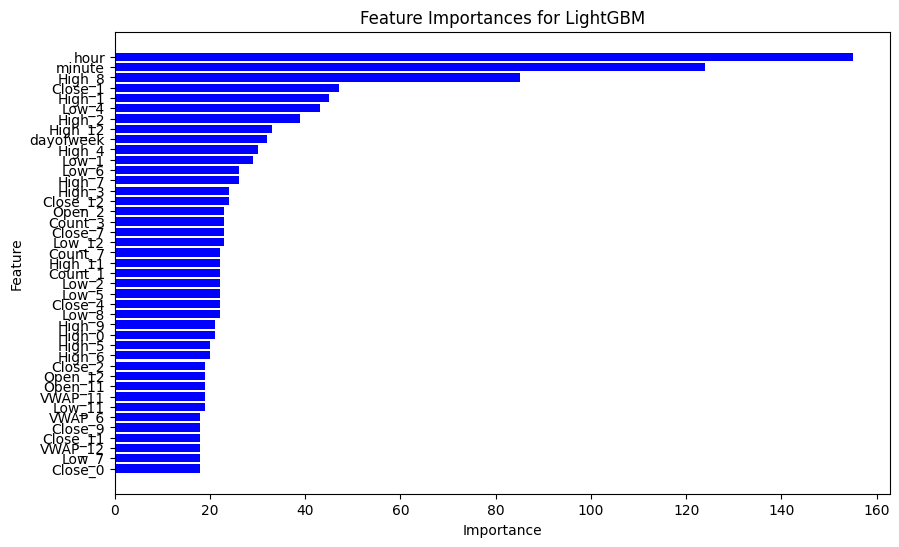

In [ ]:
## Feature importance for LightGBM

# Get the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'feature': features.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['feature'][60:], feature_importances_df['importance'][60:], color='b', align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for LightGBM')
plt.show()

# Prophet

In [ ]:
del crypto_df

In [ ]:
crypto_df = pd.read_csv(data_folder + 'train.csv')
crypto_df['timestamp'] = pd.to_datetime(crypto_df['timestamp'], unit='s')
# Fill NaN values with np.inf or -np.inf
crypto_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
import pandas as pd
from prophet import Prophet

m = Prophet(changepoint_prior_scale=0.01)

data = c[crypto_df["Asset_ID"] == 1]
data = data[['timestamp','Close']]
data.rename(columns={"timestamp": "ds", "Close": "y"}, inplace=True)

data = data[data['ds']>'2018-01-01 23:40:00']
data = data.iloc[::60, :]

data.reset_index(drop=True, inplace=True)
data.dropna(inplace=True)
data

,ds,y
0,2018-01-01 23:41:00,13454.994000
1,2018-01-02 00:41:00,13868.130000
2,2018-01-02 01:41:00,13771.292000
3,2018-01-02 02:41:00,13540.680000
4,2018-01-02 03:41:00,13413.154000
...,...,...
32571,2021-09-20 18:47:00,43532.216303
32572,2021-09-20 19:47:00,43637.700000
32573,2021-09-20 20:47:00,43328.331429
32574,2021-09-20 21:47:00,43767.107143


In [ ]:
m.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6tpxbkw/1bgcz2do.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6tpxbkw/ppojed9o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37059', 'data', 'file=/tmp/tmpo6tpxbkw/1bgcz2do.json', 'init=/tmp/tmpo6tpxbkw/ppojed9o.json', 'output', 'file=/tmp/tmpo6tpxbkw/prophet_model_1u4y13q/prophet_model-20240602204505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:45:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:46:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=1, freq='min')
future.tail()

,ds
32572,2021-09-20 19:47:00
32573,2021-09-20 20:47:00
32574,2021-09-20 21:47:00
32575,2021-09-20 22:47:00
32576,2021-09-20 22:48:00


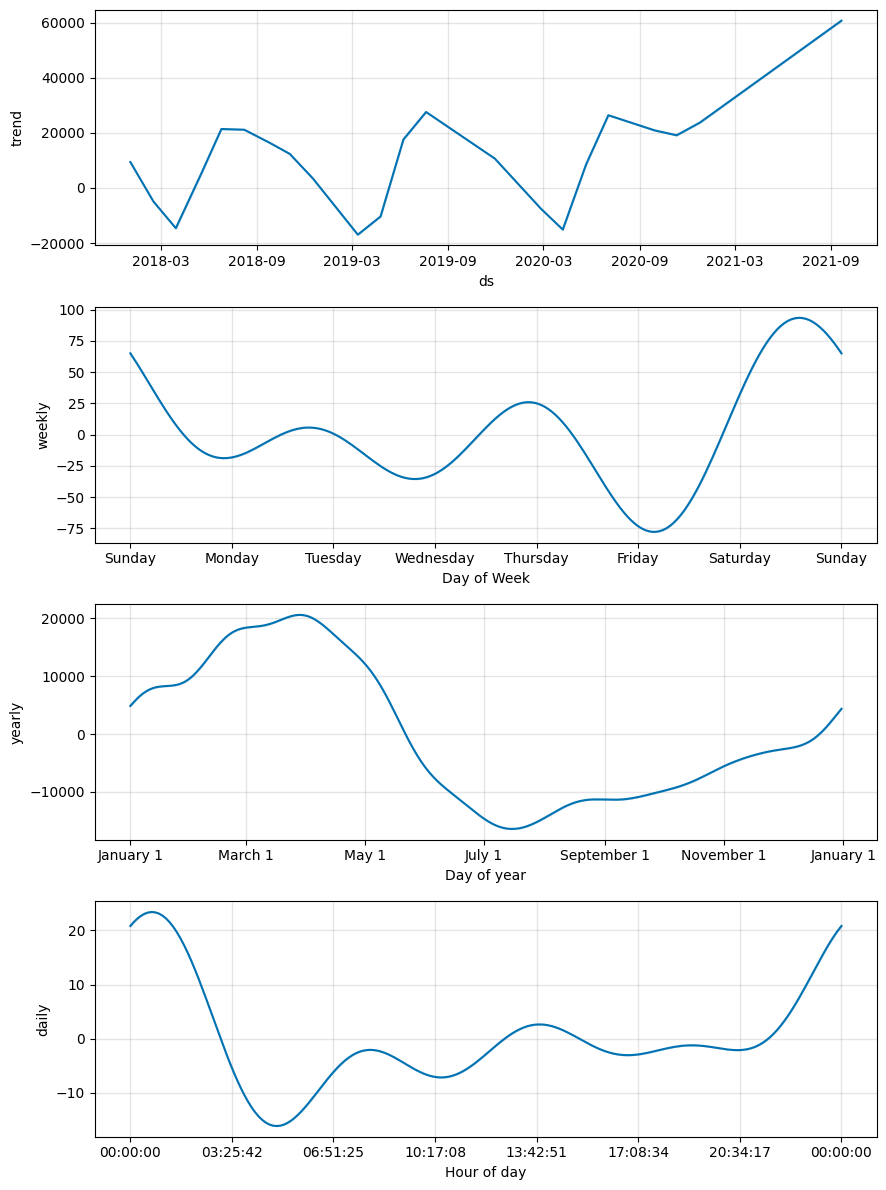

In [ ]:
fcst = m.predict(future)

fig2 = m.plot_components(fcst)